In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_clean = pd.read_csv('./train_clean.csv')
train_clean.head()

,Unnamed: 0,qid,question_text,target,clean_text
0,0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...


In [ ]:
#some removal
train=train_clean.drop('Unnamed: 0',axis=1).drop('question_text',axis=1)
train.head()

,qid,target,clean_text
0,00002165364db923c7e6,0,quebec nationalist see province nation
1,000032939017120e6e44,0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,0,convert montra helicon mountain bike changing ...


In [ ]:
train.shape

(1306122, 3)

In [ ]:
#GBT takes too long on the whole dataset so I will sample
train_sample=train.sample(frac=0.01,random_state=42)

In [ ]:
X=train_sample.drop('qid',axis=1).drop('target',axis=1)
y=train_sample.target

In [ ]:
X.head()

,clean_text
443046,effective classroom management skill technique...
947549,study abroad th class bangladesh
523769,make friend college junior
949821,download free apk minecraft pocket edition io ...
1030397,like kuvera groww also free online investment ...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [ ]:
X_train.head()

,clean_text
774434,happened gorgon fought patchy
373019,widow meet people
996260,outside america interest work closely russian
23727,antedated cheque explain example
1111433,prepare f paper acca month


In [ ]:
y_train.head()

774434     0
373019     0
996260     0
23727      0
1111433    0
Name: target, dtype: int64

In [ ]:
X_train['clean_text'].fillna('', inplace=True)
X_test['clean_text'].fillna('', inplace=True)

In [ ]:
X_train['clean_text'].isnull().sum()

0

In [ ]:
X_test['clean_text'].isnull().sum()

0

In [ ]:
vectorizer=TfidfVectorizer(analyzer='word',stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train['clean_text'])
X_test_tfidf = vectorizer.transform(X_test['clean_text'])

In [ ]:
X_train_tfidf

<10448x13279 sparse matrix of type '<class 'numpy.float64'>'
	with 58708 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<2613x13279 sparse matrix of type '<class 'numpy.float64'>'
	with 12765 stored elements in Compressed Sparse Row format>

In [ ]:
gbt=GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 10]
}
# Perform the grid search using cross-validation
grid_search = GridSearchCV(gbt, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}
Best score:  0.938074580681217


In [ ]:
grid_search.score(X_test_tfidf,y_test)

0.9441255262150785

In [ ]:
predictions=grid_search.predict(X_test_tfidf)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)


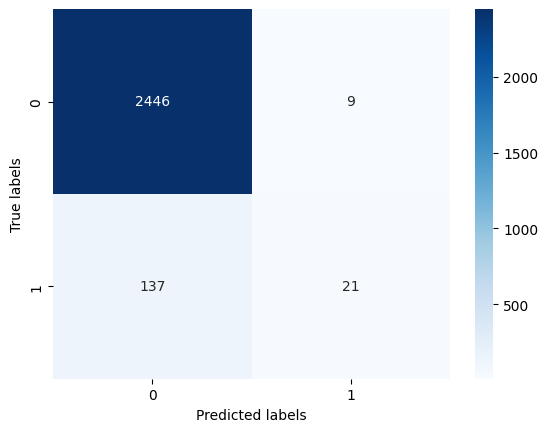

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()